# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##from google.colab import files  ###要把檔案上傳到colab才可以讀取文件
##uploaded = files.upload()

## **1.讀取數據**

In [3]:
original_house_price = pd.read_csv(r"C:\Users\User\Desktop\python\house_price.csv")
##original_house_price = pd.read_csv('house_price.csv')
original_house_price.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


#

## **2.評估和清理數據**

### 2.1 評估數據整齊度

#### 為了區分開經過清理的資料和原始的資料，我們創建新的變數`cleaned_house_price`

In [4]:
cleaned_house_price = original_house_price.copy()
cleaned_house_price.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


#### `cleaned_house_price`符合評估數據整齊的基本要件

#

### 2.2 數據乾淨度


In [5]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### 從輸出結果來看，`cleaned_house_price`共有545條觀察值，變量不存在缺失值。

#### 數據類型方面，我們已知`mainroad`（是否位於主路）、`guestroom`（是否有客房）、`basement`（是否有地下室）、`hotwaterheating`（是否有熱水器）、`airconditioning`（是否有空調）、`prefarea`（是否位於城市首選社區）、`furnishingstatus`（裝修狀態）都是分類數據，可以把數據類型都轉換為Category。


In [6]:
cleaned_house_price['mainroad'] = cleaned_house_price['mainroad'].astype("category")
cleaned_house_price['guestroom'] = cleaned_house_price['guestroom'].astype("category")
cleaned_house_price['basement'] = cleaned_house_price['basement'].astype("category")
cleaned_house_price['hotwaterheating'] = cleaned_house_price['hotwaterheating'].astype("category")
cleaned_house_price['airconditioning'] = cleaned_house_price['airconditioning'].astype("category")
cleaned_house_price['prefarea'] = cleaned_house_price['prefarea'].astype("category")
cleaned_house_price['furnishingstatus'] = cleaned_house_price['furnishingstatus'].astype("category")

In [7]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#

### 2.3 處理重複數據

In [8]:
cleaned_house_price.duplicated().sum()

np.int64(0)

#### 輸出結果是0,代表不存在重複值。

#

### 2.4 處理不一致數據

#### 不一致數據可能存在於所有分類變量中，我們要查看是否存在不同值實際指代同一目標的情況。

In [9]:
cleaned_house_price["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [10]:
cleaned_house_price["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [11]:
cleaned_house_price["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [12]:
cleaned_house_price["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [13]:
cleaned_house_price["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [14]:
cleaned_house_price["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [15]:
cleaned_house_price["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

#### 從以上輸出結果來看，均不存在不一致數據。

#

### 2.5 處理無效或錯誤數據

In [16]:
cleaned_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### 從以上統計信息來看，`cleaned_house_price`里不存在脫離現實意義的數值。

#

## **3.探索數據**

#### 在著手線性回歸分析之前，我們可以先借助資料視覺化，探索數值變數的分佈，以及與房價存在相關性的變數，為後續的進一步分析提供方向。

In [17]:
# 設置圖表色盤為"pastel"
sns.set_palette("pastel")

### 3.1 房價分佈

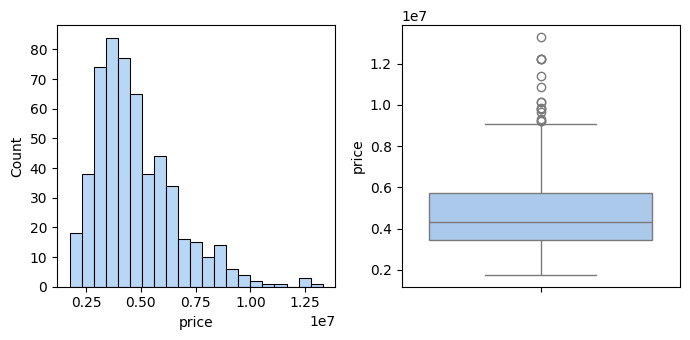

In [18]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]  ##設定整張圖的預設大小（寬 7 吋、高 3.5 吋）。這樣可以避免圖太大或太小。

plt.rcParams["figure.autolayout"] = True  ##開啟自動調整版面功能，避免子圖（subplot）之間的標籤或圖例重疊。

figure, axes = plt.subplots(1, 2)  ##建立一個畫布（figure）和兩個子圖軸（axes）。
##plt.subplots()：建立一張大的畫布（figure）；(1, 2)：代表要把這張畫布分成1列 × 2欄的網格（grid）。
##也就是說：1列（row）→ 只有一排；2欄（column）→ 同一排裡面放兩張圖。

sns.histplot(cleaned_house_price, x='price', ax=axes[0]) ## 使用Seaborn的histplot()在左邊子圖 (axes[0])畫出直方圖 (Histogram)。
### 直方圖顯示 price的分布狀況（例如大多數房價集中在哪個區間）。

sns.boxplot(cleaned_house_price, y='price', ax=axes[1]) ##在右邊子圖 (axes[1])畫出盒狀圖 (Boxplot)。
### 盒狀圖顯示 price 的中位數、四分位距與極端值（outliers），可用來判斷資料是否偏斜或有離群值。

plt.show()

#### 房價呈右偏態分佈，說明資料集中的大多數房子價格中等，但有一些價格很高的極端值，使得均值被拉高。

#


### 3.2 面積分佈

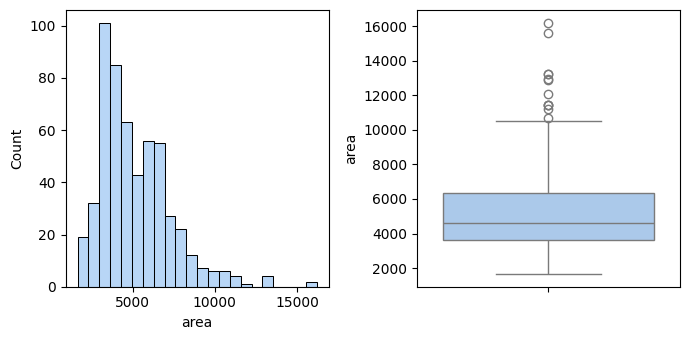

In [19]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='area', ax=axes[0])
sns.boxplot(cleaned_house_price, y='area', ax=axes[1])
plt.show()

#### 面積的分佈與房價相似，也呈右偏態分佈。

# 

### 3.3 房價與面積的關係

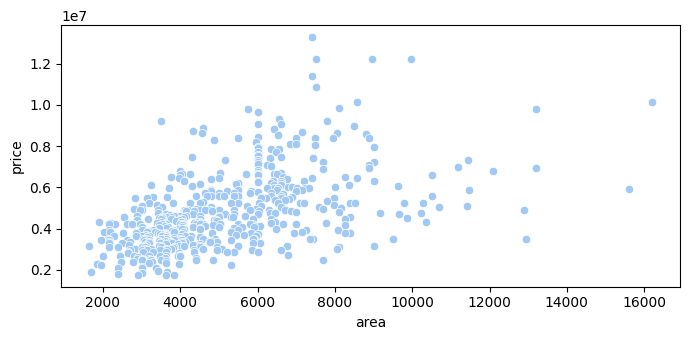

In [20]:
sns.scatterplot(cleaned_house_price, x='area', y='price')
plt.show()

#### 從散點圖來看，能大致看出一些正相關關係，但關係的強度需要後續通過計算相關性來得到。

#


### 3.4 臥室數與房價

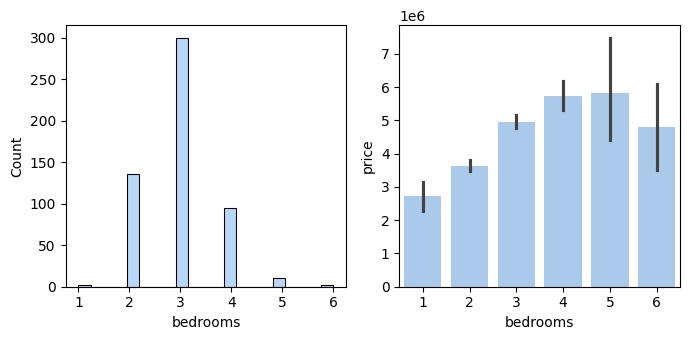

In [21]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='bedrooms', ax=axes[0])
sns.barplot(cleaned_house_price, x='bedrooms', y='price', ax=axes[1])
plt.show()

#### 此資料集中房子的臥室數範圍為1-6個，其中大多房子有2-4個。

#### 從平均房價與臥室數之間的柱狀圖來看，當臥室數小於5個時，臥室數多的房子價格也相應高，但一旦多於5個，房價並不一定相應更高。


#


### 3.5 洗手間數與房價

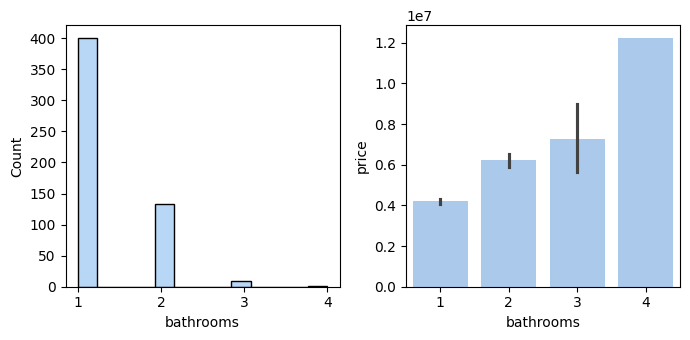

In [22]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='bathrooms', ax=axes[0])
sns.barplot(cleaned_house_price, x='bathrooms', y='price', ax=axes[1])
plt.show()

#### 資料集中房子洗手間數量最少1個，最多4個，其中為1個的數量最多。
#### 從平均房價與洗手間數之間的柱狀圖來看，洗手間多的房子價格也相應高。


#


### 3.6 樓層數與房價

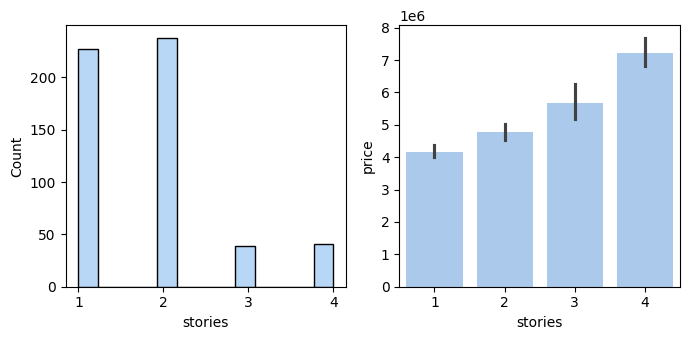

In [23]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='stories', ax=axes[0])
sns.barplot(cleaned_house_price, x='stories', y='price', ax=axes[1])
plt.show()

#### 此資料集中房子的樓層數範圍為1-4層，其中大多房子有1層或2層。
#### 從平均房價與樓層數之間的柱狀圖來看，樓層多的房子價格也相應高。


# 

### 3.7 車庫數與房價

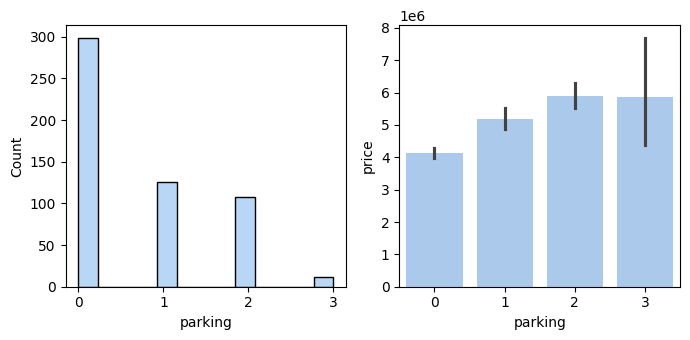

In [24]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='parking', ax=axes[0])
sns.barplot(cleaned_house_price, x='parking', y='price', ax=axes[1])
plt.show()

#### 此資料集中房子的車庫數範圍為0-3個，不帶車庫的房子數量是最多的，其次是1個和2個。
#### 從平均房價與樓層數之間的柱狀圖來看，車庫多的房子價格也相應高，但超過2個後，房價並不一定相應更高。


# 

### 3.8 是否在主路與房價

C:\Users\User\AppData\Local\Temp\ipykernel_4844\4056088210.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cleaned_house_price, x='mainroad', y='price', ax=axes[1],  palette='pastel') ## 在右邊的子圖 (axes[1]) 畫出長條圖：


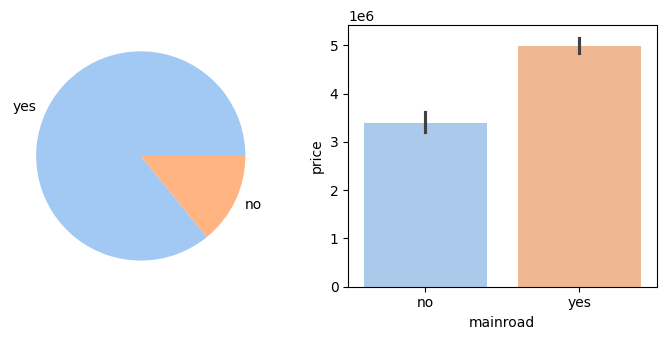

In [25]:
figure, axes = plt.subplots(1, 2)

mainroad_count = cleaned_house_price['mainroad'].value_counts() ## 計算欄位 mainroad 每個類別出現的次數。

mainroad_label = mainroad_count.index ## 取出分類標籤，也就是 ["yes", "no"]。

axes[0].pie(mainroad_count, labels=mainroad_label) ## 在左邊的子圖 (axes[0]) 畫出圓餅圖：
##每一塊代表「是否靠近主幹道」的比例。
##labels=mainroad_label 會在圖上顯示「yes」與「no」等標籤。

sns.barplot(cleaned_house_price, x='mainroad', y='price', ax=axes[1],  palette='pastel') ## 在右邊的子圖 (axes[1]) 畫出長條圖：
## x='mainroad'：以是否靠近主幹道分組；
## y='price'：顯示每組的平均房價；
## palette='pastel'為顏色參數
plt.show()

#### 此資料集中房子大多數位于主路。
#### 從平均房價與樓層數之間的柱狀圖來看，在主路的的房子價格也相應高。


#


### 3.9 是否有客人房與房價

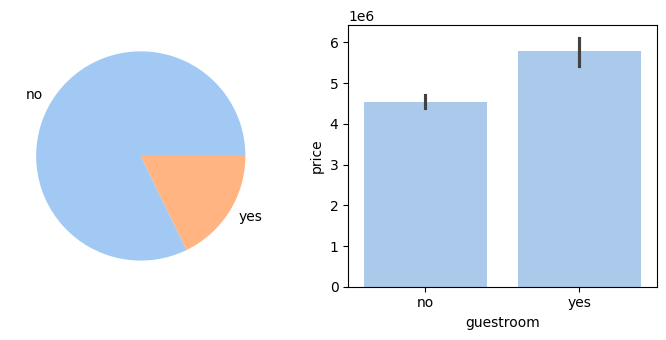

In [26]:
figure, axes = plt.subplots(1, 2)
guestroom_count = cleaned_house_price['guestroom'].value_counts()
guestroom_label = guestroom_count.index
axes[0].pie(guestroom_count, labels=guestroom_label)
sns.barplot(cleaned_house_price, x='guestroom', y='price', ax=axes[1])
plt.show()

#### 此資料集中房子大部分沒有客人房。
#### 從平均房價與樓層數之間的柱狀圖來看，有客人房的的房子價格也相應高。


#


### 3.10 是否有地下室與房價

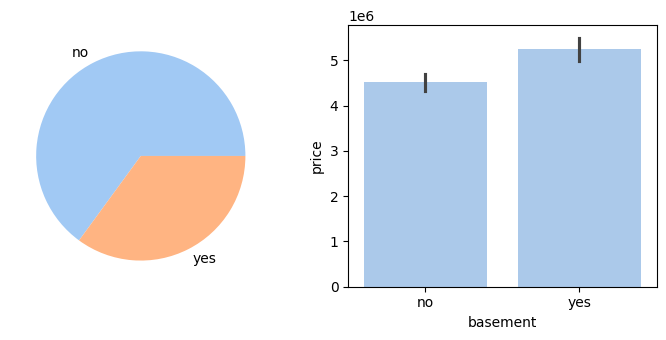

In [27]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_house_price['basement'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label)
sns.barplot(cleaned_house_price, x='basement', y='price', ax=axes[1])
plt.show()

#### 此資料集中更多的房子沒有地下室。
#### 從平均房價與地下室之間的柱狀圖來看，有地下室的的房子價格也相應高。


# 

### 3.11 是否有熱水器與房價

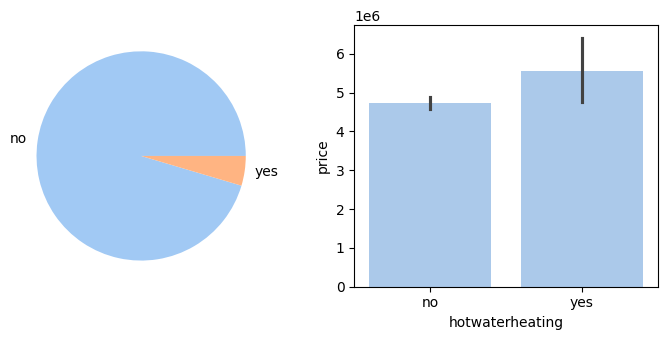

In [28]:
figure, axes = plt.subplots(1, 2)
hotwaterheating_count = cleaned_house_price['hotwaterheating'].value_counts()
hotwaterheating_label = hotwaterheating_count.index
axes[0].pie(hotwaterheating_count, labels=hotwaterheating_label)
sns.barplot(cleaned_house_price, x='hotwaterheating', y='price', ax=axes[1])
plt.show()

#### 此資料集中房子絕大部分沒有熱水器。
#### 從平均房價與熱水器之間的柱狀圖來看，有熱水器的的房子價格也相應高。


#


### 3.12 是否有空調與房價

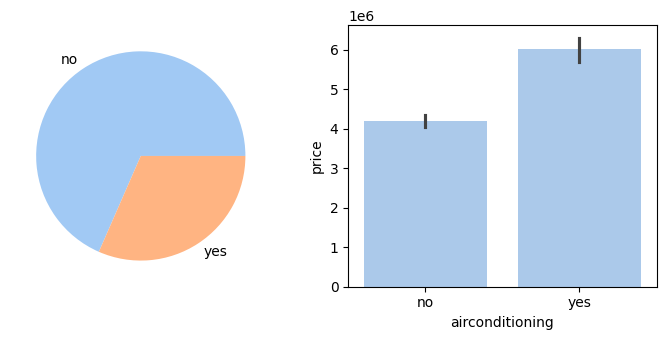

In [29]:
figure, axes = plt.subplots(1, 2)
airconditioning_count = cleaned_house_price['airconditioning'].value_counts()
airconditioning_label = hotwaterheating_count.index
axes[0].pie(airconditioning_count, labels=airconditioning_label)
sns.barplot(cleaned_house_price, x='airconditioning', y='price', ax=axes[1])
plt.show()

#### 此資料集中更多的房子沒有空調。
#### 從平均房價與空調之間的柱狀圖來看，有空調的的房子價格也相應高。


# 

### 3.13 是否位於城市首選社區與房價

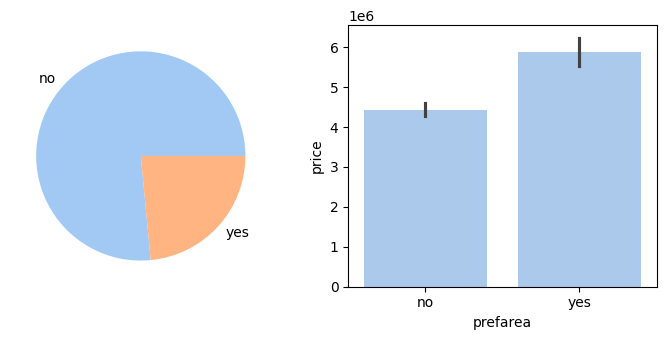

In [30]:
figure, axes = plt.subplots(1, 2)
prefarea_count = cleaned_house_price['prefarea'].value_counts()
prefarea_label = prefarea_count.index
axes[0].pie(prefarea_count, labels=prefarea_label)
sns.barplot(cleaned_house_price, x='prefarea', y='price', ax=axes[1])
plt.show()

#### 此資料集中大部分房子不在城市首選社區。
#### 從平均房價與城市首選社區之間的柱狀圖來看，在城市首選社區的的房子價格也相應高。


#


### 3.14 裝修狀態與房價

C:\Users\User\AppData\Local\Temp\ipykernel_4844\457958717.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right',)


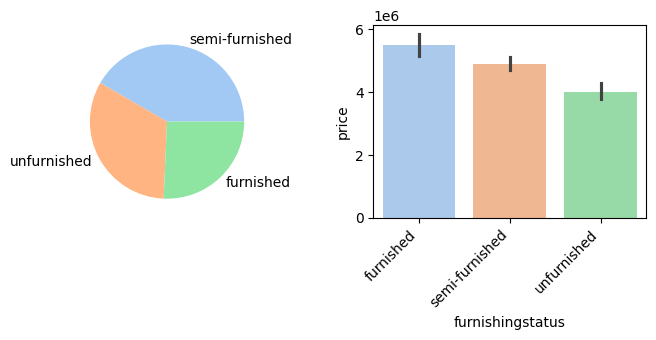

In [31]:
figure, axes = plt.subplots(1, 2)
furnishingstatus_count = cleaned_house_price['furnishingstatus'].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count, labels=furnishingstatus_label)
sns.barplot(cleaned_house_price, x='furnishingstatus', y='price', ax=axes[1], hue='furnishingstatus', palette='pastel')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right',)
## 把右邊長條圖的 x 軸標籤（例如 "furnished"、"semi-furnished"）旋轉 45 度，並往右對齊，避免標籤重疊。
## horizontalalignment='right'（也可以寫成簡寫 'ha'='right'）設定文字在水平方向上的對齊方式。
## rotation=45 → 把文字旋轉 45 度。horizontalalignment='right' → 讓旋轉後的文字以右邊為基準對齊。
plt.show()

#### 此資料集中簡裝和毛坯的房子較多，1/4左右房子為精裝。
#### 從平均房價與裝修狀態之間的柱狀圖來看，精裝的房子價格高於簡裝，簡裝高於毛坯。


# 

## **4.分析數據**

#### 在分析步驟中，我們將利用`cleaned_house_price`的資料，進行線性回歸分析，目標是得到一個可以根據房屋各個屬性對價格進行預測的數學模型。

#### **4.1** 我們先引入做線性回歸所需的模組。


In [32]:
import statsmodels.api as sm

#### 然後可以創建一個新的DataFrame`lr_house_price`，讓它作為我們進行線性回歸分析所用的資料。

#### 和`cleaned_house_price`區分開的原因是，我們在進行回歸分析前，還可能需要對資料進行一些準備，比如引入虛擬變數，這些都可以在`lr_house_price`上執行。


In [33]:
lr_house_price = cleaned_house_price.copy()
lr_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#


#### **4.2** 由於資料裡存在分類變數，無法直接建立線性回歸模型。我們需要引入虛擬變數，也就是用0和1分別表示是否屬於該分類。

In [34]:
lr_house_price = pd.get_dummies(lr_house_price, drop_first=True, columns=['mainroad', 'guestroom',
                                                         'basement', 'hotwaterheating',
                                                         'airconditioning','prefarea',
                                                         'furnishingstatus'], dtype=int)
#columns=[...]	指定要轉換成 dummy 變數的欄位名稱。例如 mainroad, guestroom 等。
#drop_first=True	刪除每組類別中的第一個 dummy 欄位，避免「多重共線性（dummy variable trap）」。
#舉例：如果 mainroad 有兩類：yes、no → 只保留一個欄位 mainroad_yes（0=no, 1=yes）。
#dtype=int	讓產生的變數是整數（0 或 1），不是預設的布林值（True/False）。
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


#


#### **4.3** 接下來，我們要把因變數和引數劃分出來。

#### 因變數是`price`變數，因為我們進行線性回歸的目的，是得到一個能根據其它可能對房屋價格有影響的變數，來預測銷售價格的模型。


In [35]:
y = lr_house_price['price']

我們可以把除價格之外的都納入引數，但需要查看它們之間的相關性。如果其中有些變數之間相關性很高，會導致共線性。

In [36]:
X = lr_house_price.drop('price', axis=1)

#


#### **4.4** 一般我們認為，當相關係數的絕對值大於0.8的時候，可能導致嚴重共線性，所以我們檢查的時候，找絕對值大於0.8的值即可。 

In [37]:
X.corr().abs() > 0.8
##.abs()：取絕對值
##> 0.8：設定判斷門檻 → 把相關係數矩陣轉換成一個「True/False 的布林矩陣」，只要相關係數 大於 0.8（高度相關）就會顯示 True。

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


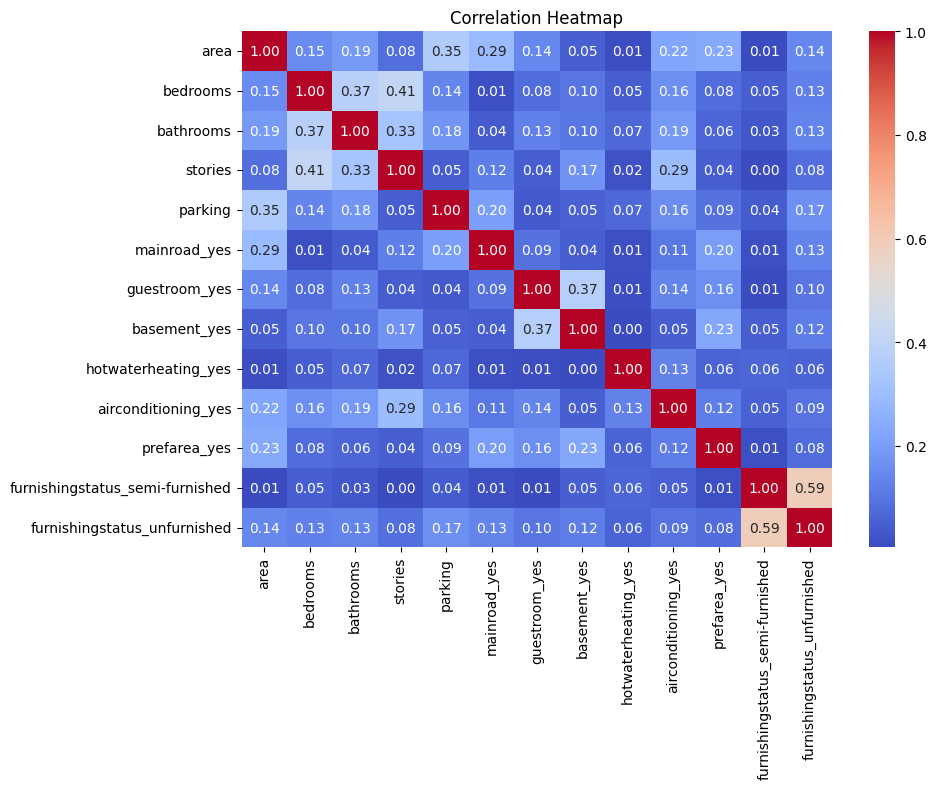

In [38]:
corr_matrix = X.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
#cmap='coolwarm'	指定顏色主題（colormap）。「coolwarm」是常用的紅藍漸層色系：
#🔵 藍色 → 負相關（-1）
#⚪ 白色 → 無相關（0）
#🔴 紅色 → 正相關（+1）
#annot=True	在每個格子中顯示數值。如果是 False，只會顯示顏色、不顯示數字。
#fmt=".2f"	控制顯示數值的小數格式。".2f" 表示保留 2 位小數（例如 0.85）。

plt.title("Correlation Heatmap")
plt.show()

#### 從以上輸出來看，不同變數之間相關係數的絕對值均小於或等於0.8。

#


#### **4.5** 接下來，給模型的線性方程添加截距。

In [39]:
X = sm.add_constant(X)
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


#


#### **4.6** 下一步就可以調用OLS函數，利用最小二乘法來得到線性回歸模型的參數值。

In [40]:
model = sm.OLS(y, X).fit()

#### 為了查看模型結果，我們使用`summary`方法來獲得總結資訊。

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          9.07e-123
Time:                        23:57:11   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 當我們把顯著區間設定為0.05時，以上結果的P值可以看出，模型認為以下因素對房屋價格沒有顯著性影響：臥室數、是否為簡裝房。此外，常數（表示線性方程的截距）的P值也很大，說明也沒有顯著影響。

#

#### **4.7** 可以把這些變數移除後，再次建立線性回歸模型。

In [42]:
X = X.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

In [43]:
model = sm.OLS(y, X).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Fri, 10 Oct 2025   Prob (F-statistic):                        0.00
Time:                        23:57:11   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 可以看到，當我們把P值較大的引數從線性回歸模型中移除後，R方的值從0.682增長到了0.957，提高了模型對現有資料的擬合度。
#### 根據各個引數在線性回歸方程中的係數來看，模型預測以下因素的增加（或存在）會顯著增加房屋價格：房屋面積、廁所數、樓層數、車庫容量、位於主路、有客房、有地下室、有熱水器、有空調、位於城市首選社區。
#### 線性回歸模型預測以下因素的增加（或存在）會顯著降低房屋價格：房屋未經裝修，為毛坯房。


#


#### **4.8** 要預測房價

#### 房屋的資訊：面積為5600平方英尺，有4個臥室、2個廁所，總共2層，不位於主路，無客人房，帶地下室，有熱水器，沒有空調，車位數為2，位於城市首選社區，簡裝修


In [45]:
price_to_predict = pd.DataFrame({'area': [5600], 'bedrooms': [4], 'bathrooms': [2],
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


#### 我們需要把分類變數的類型轉換為Category，並且通過categories參數，讓程式知道所有可能的分類值。這樣做的原因是，預測資料包含的分類可能不全。我們需要確保引入虛擬變數的時候，不會漏掉某個或某些分類。

In [46]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

In [47]:
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


In [48]:
price_to_predict = pd.get_dummies(price_to_predict, drop_first=True,
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea',
                                           'furnishingstatus'], dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [49]:
price_to_predict = price_to_predict.drop(['bedrooms', 'furnishingstatus_semi-furnished'], axis=1)
##要跟以上OLS的迴歸式一樣，因為`'const'`,`'bedrooms'`, `'furnishingstatus_semi-furnished'`以刪除，預測的時候也要一樣。

#


#### **4.9** 接下來就可以調用線性迴歸模型的`predict`方法，獲得預測價格。

In [50]:
predicted_value = model.predict(price_to_predict)
predicted_value

0    7.071927e+06
dtype: float64

#### 線性迴歸模型預測的價格為：7071927。